# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

### Task 1

In [1]:
import pandas as pd

#Read the CSV file
df = pd.read_csv("SCF_10pct.csv")
#Filter by age requirements
df = df[(df["age"] >= 25) & (df["age"] <= 89)]
#Make column "college" with assigned values based on "educ" values
df["college"] = 0
df["college"] = ((df["educ"] == 3) | (df["educ"] == 4)).astype(int)
#Divide net worth by 1000
df["networth"] = df["networth"] / 1000

print(f"Number of observations in final sample is {len(df)}")


Number of observations in final sample is 5471


### Task 2

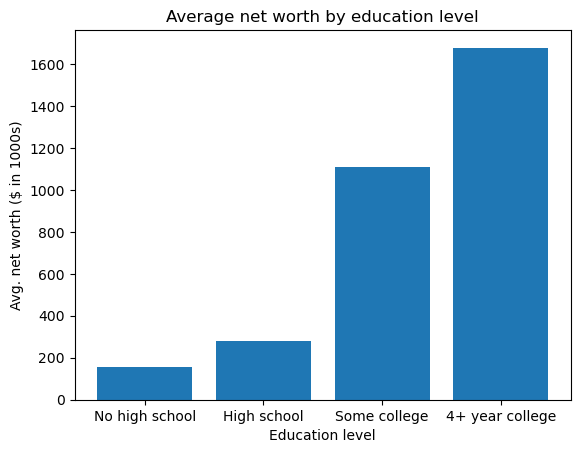

In [2]:
import matplotlib.pyplot as plt

#Using .groupby() and finding the average net worth with .mean()
avg_by_educ = df.groupby("educ")["networth"].mean()

#Values for X and Y axis
x = avg_by_educ.index
y = avg_by_educ.values

#Stylization of graph
x_labels = ["No high school", "High school", "Some college", "4+ year college"]
x_title = plt.xlabel("Education level")
y_title = plt.ylabel("Avg. net worth ($ in 1000s)")
plt.title("Average net worth by education level")

#Plot the chart
plt.bar(x, y, tick_label = x_labels)
plt.show()


### Task 3

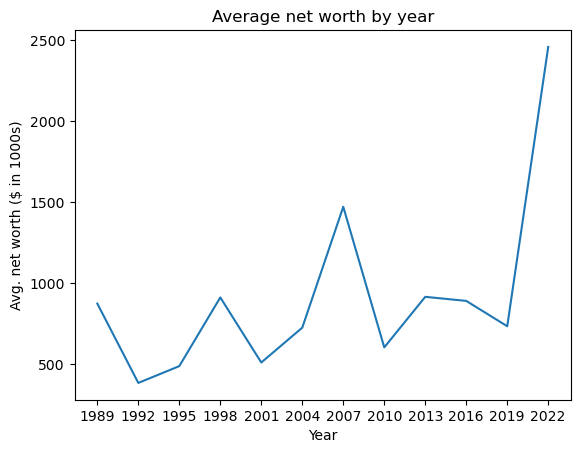

In [3]:
#Using .groupby() and finding the average net worth with .mean()
avg_by_year = df.groupby("year")["networth"].mean()

#X and Y values for chart
x = avg_by_year.index
y = avg_by_year.values

#Stylization of graph
x_title = plt.xlabel("Year")
y_title = plt.ylabel("Avg. net worth ($ in 1000s)")
plt.title("Average net worth by year")

#Plot the chart
plt.plot(x, y)
#Used AI to figure out how to name the labels individually because I wanted to include every year
x_labels = [1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022]
plt.xticks(x, x_labels)
plt.show()


### Task 4

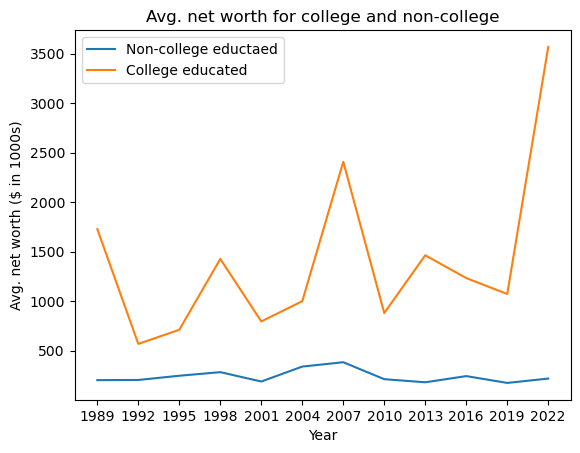

In [4]:
#Filter DataFrame by college status
college = df[df["college"] == 1]
non_college = df[df["college"] == 0]

#Grouping college and non-college by net worth per survey year
#When debugging (I got TypeError), AI provided me with the .unstack() function, to separate the tuple into just the year instead of [{year}, 0/1]
avg_by_college_and_year = college.groupby(["year", "college"])["networth"].mean().unstack("college")
avg_by_non_college_and_year = non_college.groupby(["year", "college"])["networth"].mean().unstack("college")

#X and Y values for non-college data
x1 = avg_by_non_college_and_year.index
y1 = avg_by_non_college_and_year.values

#X and Y values for college data
x2 = avg_by_college_and_year.index
y2 = avg_by_college_and_year.values

#Stylization of chart
x_title = plt.xlabel("Year")
y_title = plt.ylabel("Avg. net worth ($ in 1000s)")
plt.title("Avg. net worth for college and non-college")

#Used AI to figure out how to name labels individually (modified from task 3)
x_labels = [1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022]
plt.xticks(x1, x_labels)

#Plot the chart
plt.plot(x1, y1, label = "Non-college eductaed")
plt.plot(x2, y2, label = "College educated")
plt.legend()
plt.show()



***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 